# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Say, "the default sans-serif font is COMIC SANS"
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
sns.set_style("darkgrid")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import cm

# Dataset Downloading

In [ ]:
!gdown --id 11fPvupSmcIg5r3fQbwjeZND3nXnHq75j

Downloading...
From: https://drive.google.com/uc?id=11fPvupSmcIg5r3fQbwjeZND3nXnHq75j
To: /content/180100088@iitb.ac.in_Q1.csv
100% 4.85k/4.85k [00:00<00:00, 8.90MB/s]


In [ ]:
!gdown --id 11oEbOyFGOIh1y1xXE2pY8eWwxGWehJxe

Downloading...
From: https://drive.google.com/uc?id=11oEbOyFGOIh1y1xXE2pY8eWwxGWehJxe
To: /content/180100088@iitb.ac.in_Q2.csv
100% 8.04k/8.04k [00:00<00:00, 13.3MB/s]


In [ ]:
!gdown --id 11eT5QD9FKpSBRE8Er2nLCdOLAZp2BfSs

Downloading...
From: https://drive.google.com/uc?id=11eT5QD9FKpSBRE8Er2nLCdOLAZp2BfSs
To: /content/180100088@iitb.ac.in_Q3.csv
100% 14.6k/14.6k [00:00<00:00, 12.6MB/s]


# Q1

In [ ]:
dataset = pd.read_csv('/content/180100088@iitb.ac.in_Q1.csv')
dataset.head()
print('Number of rows (samples) in dataset:', len(dataset))
print('Number of columns in dataset:', (dataset.shape[1]))

Number of rows (samples) in dataset: 200
Number of columns in dataset: 2


In [ ]:
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Non Lin Reg

11296811.283007536


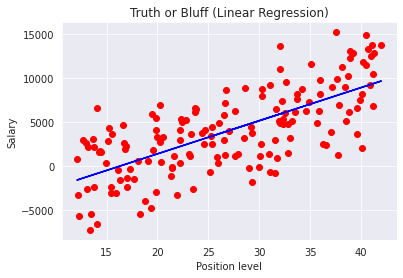

In [ ]:
# Fitting Linear Regression to the dataset

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred = lin_reg.predict(X_train)
print(mean_squared_error(y_train,y_train_pred))
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train, y_train_pred, color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [ ]:
mse_train_list = []
mse_test_list = []
for k in range(2,7):
    # Fitting Polynomial Regression to the dataset
    
    poly_reg = PolynomialFeatures(degree=k)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)

    y_train_pred = pol_reg.predict(poly_reg.fit_transform(X_train))
    mse_train = mean_squared_error(y_train,y_train_pred)
    #print(mse_train)
    mse_train_list.append(mse_train)

    y_test_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
    mse_test = mean_squared_error(y_test,y_test_pred)
    mse_test_list.append(mse_test)


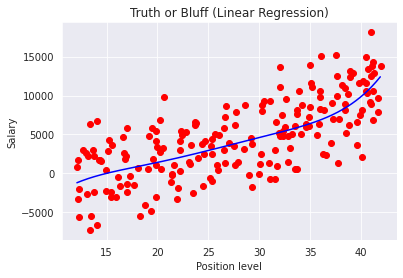

In [ ]:
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial_smooth()

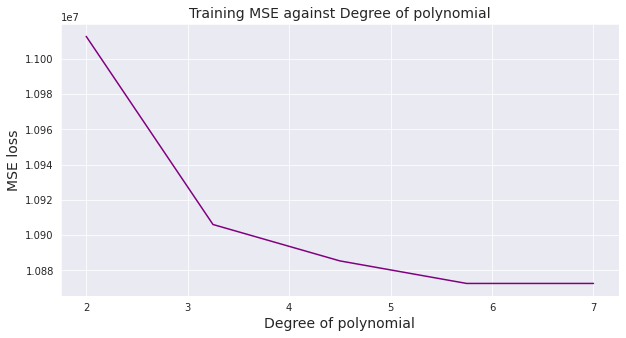

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(2,7,5),mse_train_list,color='purple')
plt.title('Training MSE against Degree of polynomial',fontsize=14)
plt.xlabel('Degree of polynomial',fontsize=14)
plt.ylabel('MSE loss',fontsize=14)
plt.show()

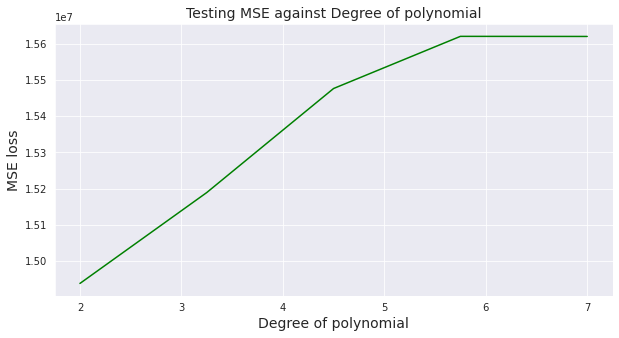

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(2,7,5),mse_test_list,color='green')
plt.title('Testing MSE against Degree of polynomial',fontsize=14)
plt.xlabel('Degree of polynomial',fontsize=14)
plt.ylabel('MSE loss',fontsize=14)
plt.show()

# KNN

In [ ]:
mse_train_list = []
mse_test_list = []
for k in [1,2,3,5,7]:
    # Fitting Polynomial Regression to the dataset
    
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    y_train_pred = neigh.predict(X_train)
    mse_train = mean_squared_error(y_train,y_train_pred)
    #print(mse_train)
    mse_train_list.append(mse_train)

    y_test_pred = neigh.predict(X_test)
    mse_test = mean_squared_error(y_test,y_test_pred)
    mse_test_list.append(mse_test)


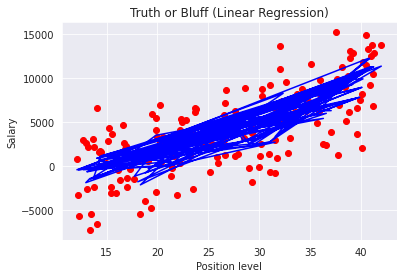

In [ ]:
def viz_knn():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train, y_train_pred, color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_knn()

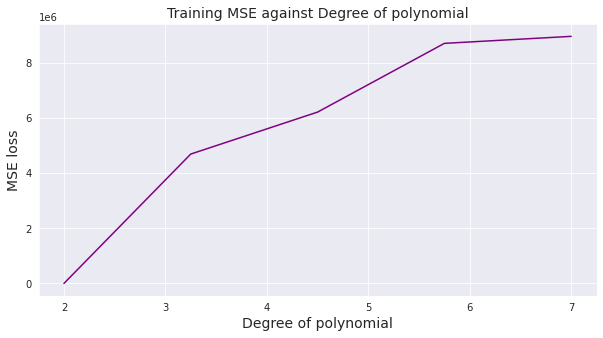

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(2,7,5),mse_train_list,color='purple')
plt.title('Training MSE against Degree of polynomial',fontsize=14)
plt.xlabel('Degree of polynomial',fontsize=14)
plt.ylabel('MSE loss',fontsize=14)
plt.show()

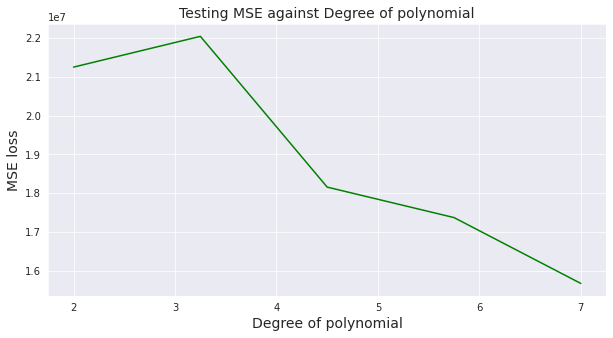

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(2,7,5),mse_test_list,color='green')
plt.title('Testing MSE against Degree of polynomial',fontsize=14)
plt.xlabel('Degree of polynomial',fontsize=14)
plt.ylabel('MSE loss',fontsize=14)
plt.show()

# Q2

In [ ]:
dataset = pd.read_csv("/content/180100088@iitb.ac.in_Q2.csv")

X = dataset.iloc[:,0:3]
y = dataset.iloc[:,3]
dataset.head()
#dataset[' Class'].value_counts()

,X1,X2,X3,Class
0,-4.226613,4.678043,11.314308,4.0
1,-6.277854,14.070848,13.680755,4.0
2,-8.083357,-7.489734,-14.800920,3.0
3,-0.675739,-14.008544,-5.799944,2.0
4,-9.663855,-2.859941,-5.674391,3.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
import numpy as np
from collections import deque
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree as ctree
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


class AABB:
    """Axis-aligned bounding box"""
    def __init__(self, n_features):
        self.limits = np.array([[-np.inf, np.inf]] * n_features)

    def split(self, f, v):
        left = AABB(self.limits.shape[0])
        right = AABB(self.limits.shape[0])
        left.limits = self.limits.copy()
        right.limits = self.limits.copy()

        left.limits[f, 1] = v
        right.limits[f, 0] = v

        return left, right


def tree_bounds(tree, n_features=None):
    """Compute final decision rule for each node in tree"""
    if n_features is None:
        n_features = np.max(tree.feature) + 1
    aabbs = [AABB(n_features) for _ in range(tree.node_count)]
    queue = deque([0])
    while queue:
        i = queue.pop()
        l = tree.children_left[i]
        r = tree.children_right[i]
        if l != ctree.TREE_LEAF:
            aabbs[l], aabbs[r] = aabbs[i].split(tree.feature[i], tree.threshold[i])
            queue.extend([l, r])
    return aabbs


def decision_areas(tree_classifier, maxrange, x=0, y=1, n_features=None):
    """ Extract decision areas.

    tree_classifier: Instance of a sklearn.tree.DecisionTreeClassifier
    maxrange: values to insert for [left, right, top, bottom] if the interval is open (+/-inf) 
    x: index of the feature that goes on the x axis
    y: index of the feature that goes on the y axis
    n_features: override autodetection of number of features
    """
    tree = tree_classifier.tree_
    aabbs = tree_bounds(tree, n_features)

    rectangles = []
    for i in range(len(aabbs)):
        if tree.children_left[i] != ctree.TREE_LEAF:
            continue
        l = aabbs[i].limits
        r = [l[x, 0], l[x, 1], l[y, 0], l[y, 1], np.argmax(tree.value[i])]
        rectangles.append(r)
    rectangles = np.array(rectangles)
    rectangles[:, [0, 2]] = np.maximum(rectangles[:, [0, 2]], maxrange[0::2])
    rectangles[:, [1, 3]] = np.minimum(rectangles[:, [1, 3]], maxrange[1::2])
    return rectangles

def plot_areas(rectangles):
    i=0
    for rect in rectangles:
        
        #print(rect)
        #print(i)
        color = ['b', 'r','g','m','y','c','maroon','aqua','lime'][i]
        i+=1
        #print(rect[0], rect[1], rect[2] - rect[0], rect[3] - rect[1])
        rp = Rectangle([rect[0], rect[2]], 
                       rect[1] - rect[0], 
                       rect[3] - rect[2], color=color, alpha=0.2)
        plt.gca().add_artist(rp)

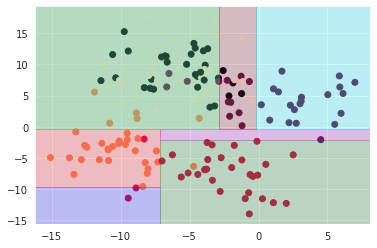

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
x = X_train.values
y = y_train.values
dtc = DecisionTreeClassifier().fit(x, y)
rectangles = decision_areas(classifier, [-1e5, 1e5, -1e5, 1e5], x=0, y=1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plot_areas(rectangles)

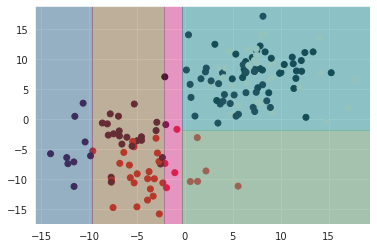

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
x = X_train.values
y = y_train.values
dtc = DecisionTreeClassifier().fit(x, y)
rectangles = decision_areas(classifier, [-1e5, 1e5, -1e5, 1e5], x=1, y=2)
plt.scatter(x[:, 1], x[:, 2], c=y**2)
plot_areas(rectangles)

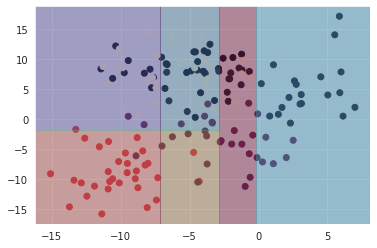

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
x = X_train.values
y = y_train.values
dtc = DecisionTreeClassifier().fit(x, y)
rectangles = decision_areas(classifier, [-1e5, 1e5, -1e5, 1e5], x=0, y=2)
plt.scatter(x[:, 0], x[:, 2], c=y**2)
plot_areas(rectangles)

In [ ]:
# # X - some data in 2dimensional np.array

# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # here "model" is your model's prediction (classification) function
# Z = model(np.c_[xx.ravel(), yy.ravel()]) 

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=pl.cm.Paired)
# plt.axis('off')

# # Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

In [ ]:
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})

Accuracy: 0.74


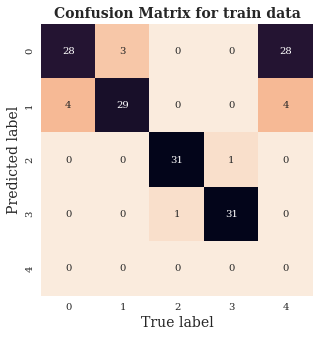

In [ ]:
# Model performance on training set
y_pred_train =classifier.predict(X_train)
cmap = sns.cm.rocket_r
from sklearn import metrics
from sklearn.metrics import confusion_matrix
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
#print('Confusion Matrix: \n', cm)
plt.figure(figsize=(10,5))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap=cmap
            )
plt.title('Confusion Matrix for train data',fontsize=14, weight='bold')
plt.xlabel('True label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14);

Accuracy: 0.68


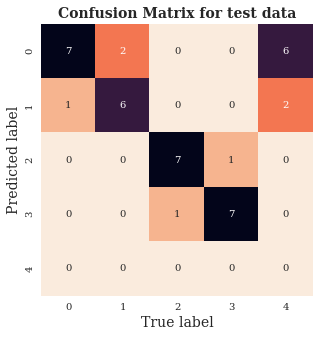

In [ ]:
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
#print('Confusion Matrix: \n', cm)
plt.figure(figsize=(10,5))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap=cmap
            )
plt.title('Confusion Matrix for test data',fontsize=14, weight='bold')
plt.xlabel('True label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14);

# SVM

In [ ]:
from sklearn import svm

Accuracy: 0.76


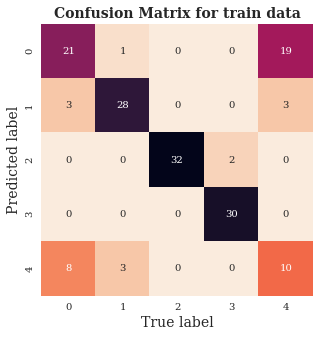

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_train =clf.predict(X_train)
cmap = sns.cm.rocket_r
from sklearn import metrics
from sklearn.metrics import confusion_matrix
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
#print('Confusion Matrix: \n', cm)
plt.figure(figsize=(10,5))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap=cmap
            )
plt.title('Confusion Matrix for train data',fontsize=14, weight='bold')
plt.xlabel('True label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14);

In [ ]:
# clf.intercept_
# clf.coef_

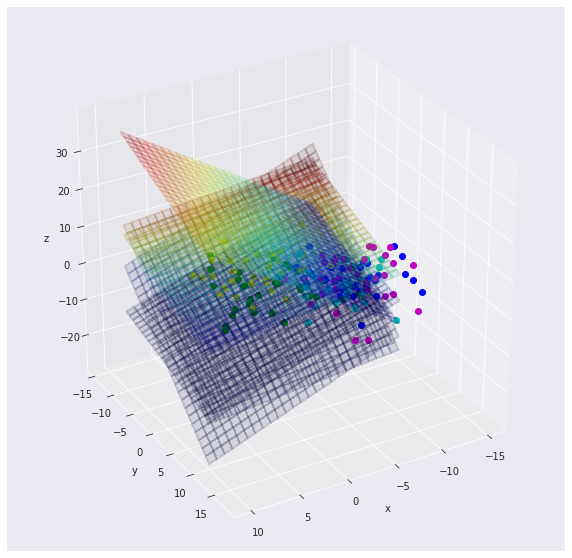

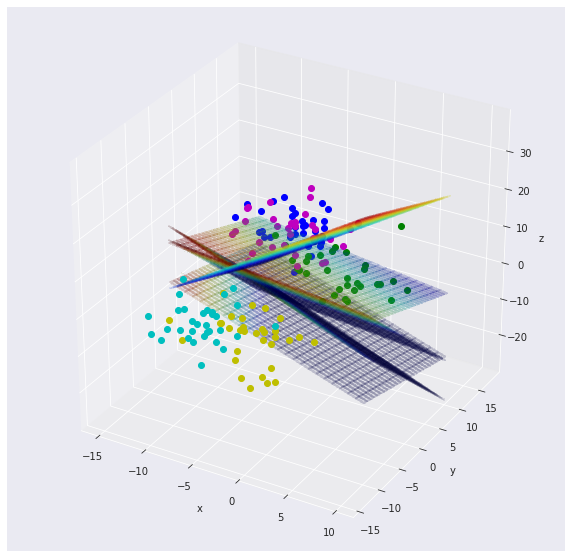

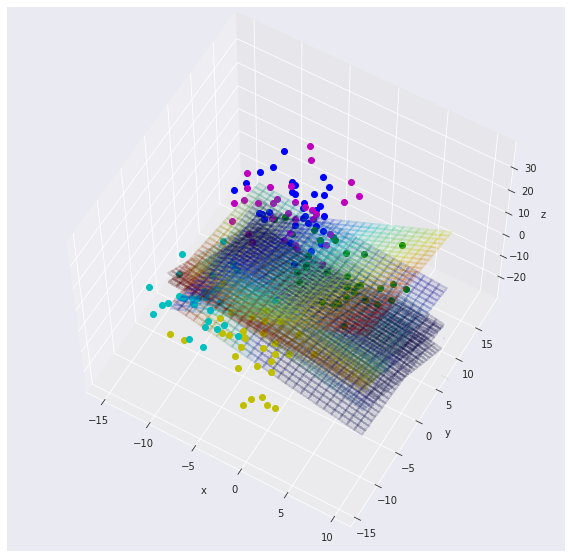

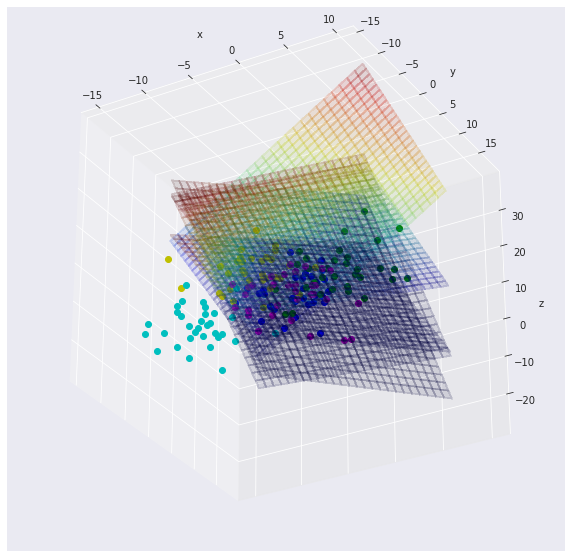

In [ ]:
from matplotlib import cm
X = X_train.values
Y = y_train.values
z1 = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][2]
z2 = lambda x,y: (-clf.intercept_[1]-clf.coef_[1][0]*x-clf.coef_[1][1]*y) / clf.coef_[1][2]
z3 = lambda x,y: (-clf.intercept_[2]-clf.coef_[2][0]*x-clf.coef_[2][1]*y) / clf.coef_[2][2]
z4 = lambda x,y: (-clf.intercept_[3]-clf.coef_[3][0]*x-clf.coef_[3][1]*y) / clf.coef_[3][2]
z5 = lambda x,y: (-clf.intercept_[4]-clf.coef_[4][0]*x-clf.coef_[4][1]*y) / clf.coef_[4][2]

tmp = np.linspace(-10,10,51)
x,y = np.meshgrid(tmp,tmp)

list_of_list = [[60,10,30],[-60,10,30],[-60,10,60],[-60,10,-30]]

for i in range(4):
    fig = plt.figure(figsize=(10,10))
    ax  = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    #ax.w_xaxis.set_pane_color((0.80, 0.80, 1.0, 1.0))
    my_col1 = cm.jet(z1(x,y)/np.amax(z1(x,y)))
    my_col2 = cm.jet(z2(x,y)/np.amax(z2(x,y)))
    my_col3 = cm.jet(z3(x,y)/np.amax(z3(x,y)))
    my_col4 = cm.jet(z4(x,y)/np.amax(z4(x,y)))
    my_col5 = cm.jet(z5(x,y)/np.amax(z5(x,y)))

    #my_col = cm.jet(np.random.rand(z(x,y).shape[0],z(x,y).shape[1]))

    ax.plot_surface(x, y, z1(x,y) ,facecolors = my_col1,alpha=0.1,antialiased=False)
    ax.plot_surface(x, y, z2(x,y) ,facecolors = my_col2,alpha=0.1,antialiased=False)
    ax.plot_surface(x, y, z3(x,y) ,facecolors = my_col3,alpha=0.1,antialiased=False)
    ax.plot_surface(x, y, z4(x,y) ,facecolors = my_col4,alpha=0.1,antialiased=False)
    ax.plot_surface(x, y, z5(x,y) ,facecolors = my_col5,alpha=0.1,antialiased=False)

    ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
    ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'og')
    ax.plot3D(X[Y==2,0], X[Y==2,1], X[Y==2,2],'oy')
    ax.plot3D(X[Y==3,0], X[Y==3,1], X[Y==3,2],'oc')
    ax.plot3D(X[Y==4,0], X[Y==4,1], X[Y==4,2],'om')
    azim,dist,elev = list_of_list[i][0],list_of_list[i][1],list_of_list[i][2]
    if azim is not None:
        ax.azim = azim
    if dist is not None:
        ax.dist = dist
    if elev is not None:
        ax.elev = elev
    #plt.show()
    plt.savefig(
        'main2_{}_{}_{}.png'.format(ax.azim, ax.dist, ax.elev),
        format='png',
        bbox_inches='tight'
    )

Accuracy: 0.70


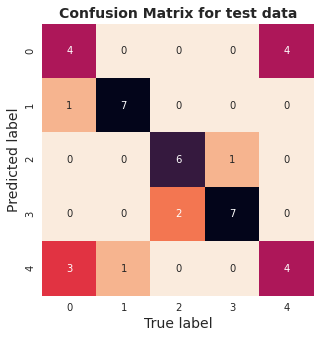

In [ ]:
y_pred=clf.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
#print('Confusion Matrix: \n', cm)
plt.figure(figsize=(10,5))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap=cmap
            )
plt.title('Confusion Matrix for test data',fontsize=14, weight='bold')
plt.xlabel('True label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14);

# Q3

In [ ]:
df3 = pd.read_csv("/content/180100088@iitb.ac.in_Q3.csv")
print("Shape of input data: ", df3.shape)
display(df3.head())
X = df3.values

Shape of input data:  (200, 6)


,X1,X2,X3,X4,X5,X6
0,1480.942322,-2078.371096,958.674798,2066.286149,-3876.620724,-1526.443991
1,116.147090,-569.969056,1797.484556,3063.092759,-5069.980875,-3181.337358
2,395.470675,-2540.901663,848.337207,-742.302567,-334.869096,-382.577447
3,150.389378,-2970.136414,445.888976,1967.848220,-1400.873877,-1701.485210
4,785.859181,-1525.463407,48.470508,1224.944858,69.145648,1.134750


# PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(X)
#PCA(n_components=2)
# print(pca.explained_variance_ratio_)
# np.cumsum(pca.explained_variance_ratio_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

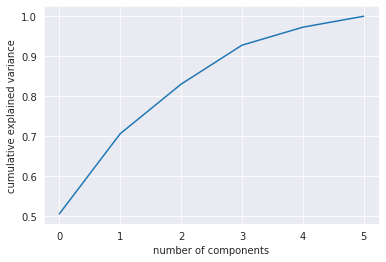

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(n_components=5)
X_trans = pca.fit_transform(X)
df_trans = pd.DataFrame(X_trans)
df_trans.head()

,0,1,2,3,4
0,-1933.718745,346.471203,679.168363,-477.042733,959.683212
1,-3203.126929,-380.037482,-1156.527780,-2399.335585,149.779129
2,1853.107193,11.101360,482.250127,2186.966422,-247.208007
3,43.529323,-1130.774607,1233.615770,86.388892,-372.953760
4,2374.247153,443.216224,1024.542806,177.988681,173.629401


In [ ]:
X_inv_trans = pca.inverse_transform(X_trans)
df_inv_trans = pd.DataFrame(X_inv_trans)
df_inv_trans.columns = df_inv_trans.columns +1
df_inv_trans.head(3)

,1,2,3,4,5,6
0,1441.025015,-2088.003877,740.391356,2109.830208,-3880.449343,-1533.154587
1,10.800254,-595.391188,1221.406862,3178.011054,-5080.085087,-3199.047471
2,299.779264,-2563.993763,325.059151,-637.916956,-344.047219,-398.664363


In [ ]:
df3.head(3)

,X1,X2,X3,X4,X5,X6
0,1480.942322,-2078.371096,958.674798,2066.286149,-3876.620724,-1526.443991
1,116.147090,-569.969056,1797.484556,3063.092759,-5069.980875,-3181.337358
2,395.470675,-2540.901663,848.337207,-742.302567,-334.869096,-382.577447


In [ ]:
df_merged = pd.concat([df_inv_trans,df3],axis=1).head(3)
df_merged = df_merged[[1,'X1',2,' X2',3,' X3',4,' X4',5,' X5',6,' X6']]
df_merged.head()

,1,X1,2,X2,3,X3,4,X4,5,X5,6,X6
0,1441.025015,1480.942322,-2088.003877,-2078.371096,740.391356,958.674798,2109.830208,2066.286149,-3880.449343,-3876.620724,-1533.154587,-1526.443991
1,10.800254,116.147090,-595.391188,-569.969056,1221.406862,1797.484556,3178.011054,3063.092759,-5080.085087,-5069.980875,-3199.047471,-3181.337358
2,299.779264,395.470675,-2563.993763,-2540.901663,325.059151,848.337207,-637.916956,-742.302567,-344.047219,-334.869096,-398.664363,-382.577447
